# An introduction to the Baseline Surface Radiation Network (BSRN)

```{post} 2021-07-05
:tags: pvlib, solar, open science, gsoc
```

Ground measured irradiance data is often referred to as "ground truth", due to being used as reference data for validating lesser accurate satellite derived and modelled irradiance data. However, making high-quality solar radiation measurements is expensive and requires weekly maintenance, hence only few of such stations exists, often operated by national meterological institutions.

The Baselines Surface Radiation Network ([BSRN](https://bsrn.awi.de/)) is the only world-wide network of high-quality solar radiation monitoring stations.

Here's a complete list of active and inactive stations:

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [2]:
bsrn_station_listing_url = 'https://wiki.pangaea.de/wiki/BSRN#Sortable_Table_of_Stations'

bsrn_stations = pd.read_html(bsrn_station_listing_url)[0]
bsrn_stations

,Station full name,Abbreviation,Location,Latitude,Longitude,Elevation,First dataset in archive,Upward fluxes (in LR),Surface type,Topography type,Rural/Urban II,Comment
0,Alert,ALE,"Canada, Lincoln Sea",82.4900,-62.4200,127.0,2004-08-16,LR0300,tundra,hilly,rural,Closed
1,Alice Springs,ASP,"Australia, Northern Territory",-23.7980,133.8880,547.0,1995-01-01,NaN,grass,flat,rural,NaN
2,Barrow,BAR,"USA , Alaska",71.3230,-156.6070,8.0,1992-01-01,LR0300,tundra,flat,rural,NaN
3,Bermuda,BER,"USA, Bermuda",32.2670,-64.6670,8.0,1992-01-01,NaN,"water, ocean",flat,rural,NaN
4,Billings,BIL,"USA, Oklahoma",36.6050,-97.5160,317.0,1993-06-01,NaN,grass,flat,rural,NaN
5,Bondville,BON,"USA, Illinois",40.0667,-88.3667,213.0,1995-01-01,LR3010,grass,flat,rural,NaN
6,Boulder,BOS,"USA, Colorado",40.1250,-105.2370,1689.0,1995-07-01,LR3010,grass,hilly,rural,NaN
7,Boulder,BOU,"USA, Colorado",40.0500,-105.0070,1577.0,1992-01-01,LR3300,grass,flat,rural,Closed in July 2016
8,Brasilia,BRB,"Brazil, Brasilia City",-15.6010,-47.7130,1023.0,2006-02-01,NaN,"concrete, since 2015: shrub",flat,rural,NaN
9,Budapest-Lorinc,BUD,"Hungary, Budapest",47.4291,19.1822,139.1,2019-06-01,LR0300,grass,flat,rural,NaN


The global coverage of the BSRN can be more readily appreciated by visualizing plotting the station locations on a map:

In [8]:
import folium  # Import the Folium library
# Initialize Folium map
m = folium.Map(
    location=[15, 15],
    zoom_start=1,
    min_zoom=1,
    max_bounds=True,
    tiles='openstreetmap')

# Add each station to the map
for index, row in bsrn_stations.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station full name']} ({row.name})",
        icon=folium.Icon(color='blue')
    ).add_to(m)

m  # Show the map

## Downloading BSRN data

The "station-to-archive" file format is described in the [technical plan for BSRN data](https://bsrn.awi.de/fileadmin/user_upload/bsrn.awi.de/Publications/Hegner.pdf) from 1998 and in the [updated version](https://bsrn.awi.de/fileadmin/user_upload/bsrn.awi.de/Publications/gcos-174.pdf) from 2013

In [4]:
import os
BSRN_USERNAME = os.environ['BSRN_FTP_USERNAME']
BSRN_PASSWORD = os.environ['BSRN_FTP_PASSWORD']


KeyError: 'BSRN_FTP_USERNAME'

In [10]:
# !In future release station argument will come before start/end!
import pvlib

df, meta = pvlib.iotools.get_bsrn(
    start=pd.Timestamp(2018,6,1), end=pd.Timestamp(2018,8,31), station='cab',
    username=BSRN_USERNAME, password=BSRN_PASSWORD)

df.head()

,ghi,ghi_std,ghi_min,ghi_max,dni,dni_std,dni_min,dni_max,dhi,dhi_std,dhi_min,dhi_max,lwd,lwd_std,lwd_min,lwd_max,temp_air,relative_humidity,pressure
2018-06-01 00:00:00+00:00,-1.0,0.1,-1.0,-1.0,1.0,0.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,342.0,0.1,342.0,343.0,17.0,100.0,1015.0
2018-06-01 00:01:00+00:00,-1.0,0.1,-1.0,-1.0,1.0,0.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,342.0,0.1,342.0,342.0,17.1,100.0,1015.0
2018-06-01 00:02:00+00:00,-1.0,0.1,-1.0,-1.0,1.0,0.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,342.0,0.3,342.0,343.0,17.2,100.0,1015.0
2018-06-01 00:03:00+00:00,-1.0,0.1,-1.0,-1.0,1.0,0.0,1.0,1.0,-1.0,0.1,-1.0,-1.0,342.0,0.1,342.0,343.0,17.2,100.0,1015.0
2018-06-01 00:04:00+00:00,-1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,343.0,0.5,342.0,344.0,17.3,100.0,1015.0


Let's visualize the three components of irradiance:

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

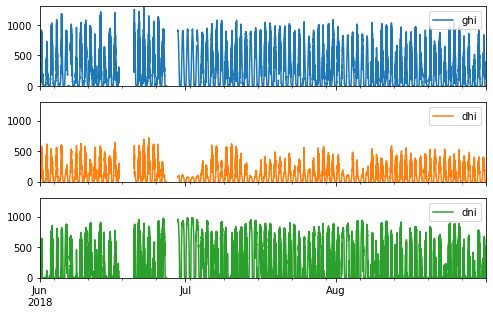

In [15]:
df[['ghi', 'dhi', 'dni']].plot(subplots=True, figsize=(8,5), ylim=[-10, 1300])